In [1]:
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from PIL import Image
from matplotlib.ticker import MaxNLocator
levels = MaxNLocator(nbins=70).tick_values(0.8,6.5)

In [2]:
mask=[]
maskc=0
imask=Image.open("mask.png")
pixx=imask.load()
w,h=imask.size
for i in range(0,w):
    for j in range(0,h):
        if(pixx[i,j]==(0,0,0)):
            mask.append([i,j])
            maskc+=1

In [3]:
def read_n_plot(f,v,l):
    x0,x1,y0,y1=72.5,73.5,18.5,19.5
    
    map_dataset=Dataset(f,maskandscale=True,mmap=False)
    
    lats=map_dataset.variables['lat'][:]
    lons=map_dataset.variables['lon'][:]
    elements  = map_dataset.variables[v][:]
    
    index_lats=len(lats)
    index_lons=len(lons)
    
    ax   = plt.axes(projection=ccrs.PlateCarree())
    
    plot=plt.contourf(lons, lats, elements, cmap = 'viridis', transform=ccrs.PlateCarree(),levels=l)
    #plt.clim(0,0.24)
    plt.colorbar(plot, ax=ax, shrink=0.8,pad=0.15)
    plt.title('Mumbai '+str(f[0:-4]))
    
    ax.set_extent([72.75,73.05,18.85,19.35])   # regional map (x0, x1, y0, y1)  
    #ax.set_extent([0,80,-30,40])
    ax.coastlines(color='red')
    ax.gridlines(draw_labels=True)
    
    
    new_name='fig '+str(f[0:-4])+' '+str(v)
    plt.savefig(new_name,bbox_inches="tight",dpi=800)
    
    plt.show()

In [4]:
def fmask(v,m):
    latest_plot='fig'+v
    im=Image.open(latest_plot+'.png')
    pixels=im.load()
    for k in range(0,m):
        (i,j)=(mask[k])
        pixels[i,j]=(0,0,0)
    im.save('new'+latest_plot+'.png')

In [4]:
def plotx(f,v,l):
    nf=f+'.nc4'
    read_n_plot(nf,v,l)
    

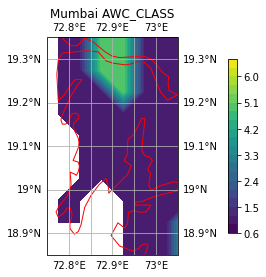

In [5]:
levels = MaxNLocator(nbins=20).tick_values(0.8,6.5)
plotx('AWC_CLASS','AWC_CLASS',levels)

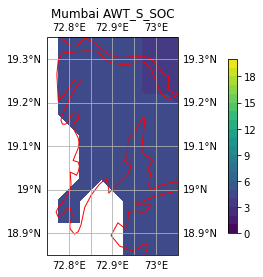

In [6]:
levels = MaxNLocator(nbins=20).tick_values(0,20)
plotx('AWT_S_SOC','SUM_s_c_1',levels)

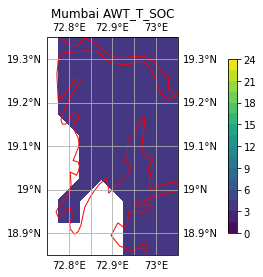

In [7]:
levels = MaxNLocator(nbins=20).tick_values(0,24)
plotx('AWT_T_SOC','SUM_t_c_12',levels)

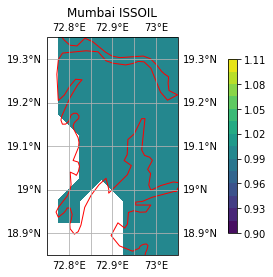

In [8]:
levels = MaxNLocator(nbins=20).tick_values(0.9,1.1)
plotx('ISSOIL','ISSOIL',levels)

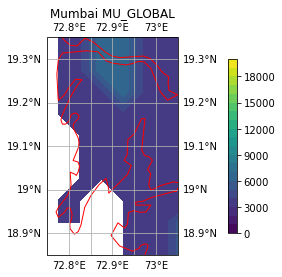

In [9]:
levels = MaxNLocator(nbins=20).tick_values(0,20000)
plotx('MU_GLOBAL','MU_GLOBAL',levels)

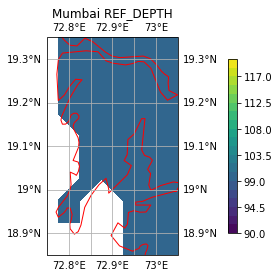

In [10]:
levels = MaxNLocator(nbins=20).tick_values(90,120)
plotx('REF_DEPTH','REF_DEPTH',levels)

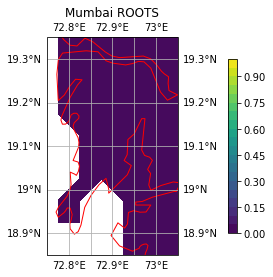

In [11]:
levels = MaxNLocator(nbins=20).tick_values(0,1)
plotx('ROOTS','ROOTS',levels)

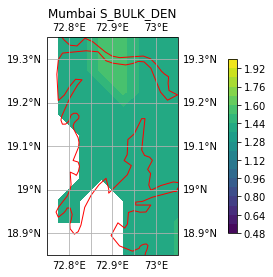

In [12]:
levels = MaxNLocator(nbins=20).tick_values(0.5,2)
plotx('S_BULK_DEN','S_BULK_DEN',levels)

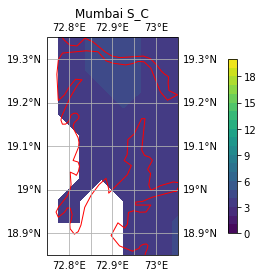

In [13]:
levels = MaxNLocator(nbins=20).tick_values(0,20)
plotx('S_C','s_c',levels)

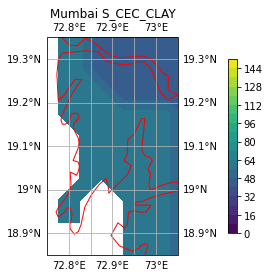

In [14]:
levels = MaxNLocator(nbins=20).tick_values(0,150)
plotx('S_CEC_CLAY','S_CEC_CLAY',levels)

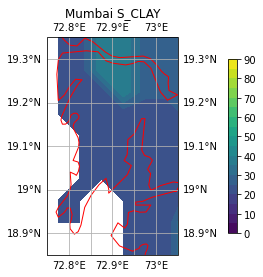

In [15]:
levels = MaxNLocator(nbins=20).tick_values(0,90)
plotx('S_CLAY','S_CLAY',levels)

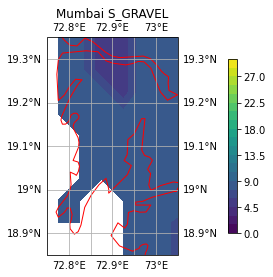

In [16]:
levels = MaxNLocator(nbins=20).tick_values(0,30)
plotx('S_GRAVEL','S_GRAVEL',levels)

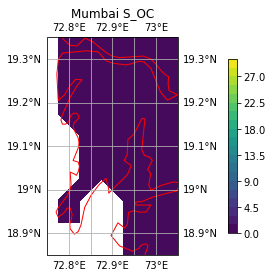

In [17]:
plotx('S_OC','S_OC',levels)

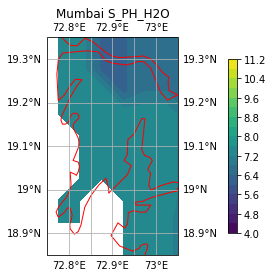

In [18]:
levels = MaxNLocator(nbins=20).tick_values(4,11)
plotx('S_PH_H2O','S_PH_H2O',levels)

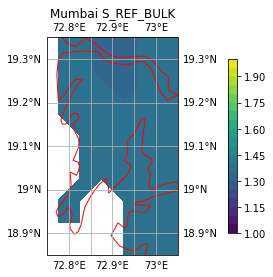

In [19]:
levels = MaxNLocator(nbins=20).tick_values(1,2)
plotx('S_REF_BULK','S_REF_BULK',levels)

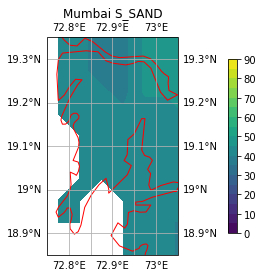

In [20]:
levels = MaxNLocator(nbins=20).tick_values(0,90)
plotx('S_SAND','S_SAND',levels)

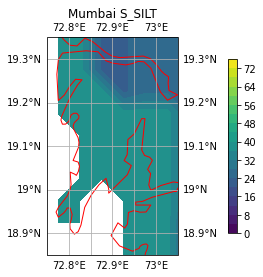

In [21]:
levels = MaxNLocator(nbins=20).tick_values(0,75)
plotx('S_SILT','S_SILT',levels)

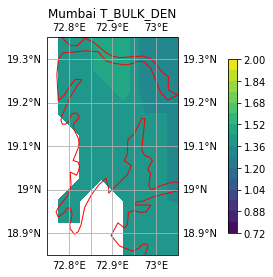

In [22]:
levels = MaxNLocator(nbins=20).tick_values(0.75,2)
plotx('T_BULK_DEN','T_BULK_DEN',levels)

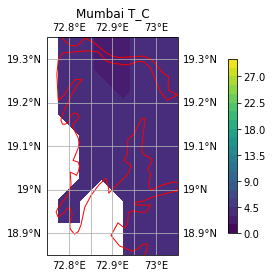

In [23]:
levels = MaxNLocator(nbins=20).tick_values(0,30)
plotx('T_C','t_c',levels)

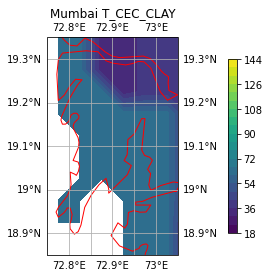

In [24]:
levels = MaxNLocator(nbins=20).tick_values(20,140)
plotx('T_CEC_CLAY','T_CEC_CLAY',levels)

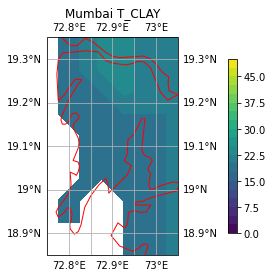

In [25]:
levels = MaxNLocator(nbins=20).tick_values(0,50)
plotx('T_CLAY','T_CLAY',levels)

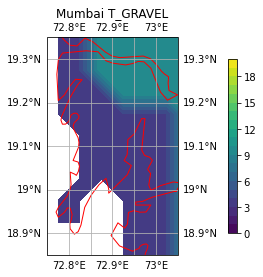

In [26]:
levels = MaxNLocator(nbins=20).tick_values(0,20)
plotx('T_GRAVEL','T_GRAVEL',levels)

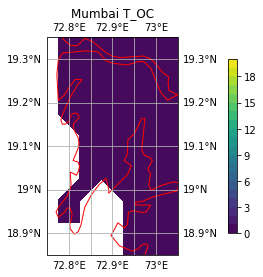

In [27]:
levels = MaxNLocator(nbins=20).tick_values(0,20)
plotx('T_OC','T_OC',levels)

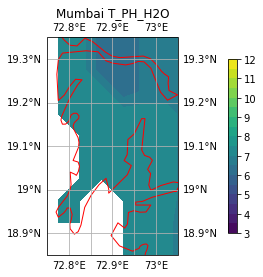

In [28]:
levels = MaxNLocator(nbins=20).tick_values(3,12)
plotx('T_PH_H2O','T_PH_H2O',levels)

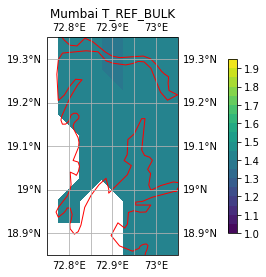

In [29]:
levels = MaxNLocator(nbins=20).tick_values(1,1.95)
plotx('T_REF_BULK','T_REF_BULK',levels)

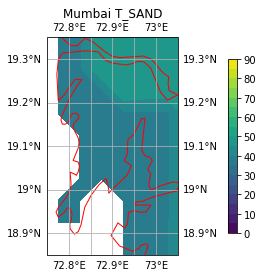

In [30]:
levels = MaxNLocator(nbins=20).tick_values(0,90)
plotx('T_SAND','T_SAND',levels)

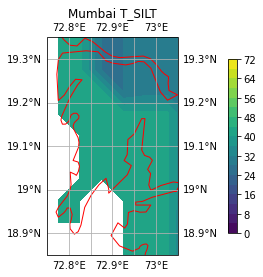

In [31]:
levels = MaxNLocator(nbins=20).tick_values(0,70)
plotx('T_SILT','T_SILT',levels)